# <font color='orange'> Lab | Handling Data Imbalance in Classification Models </font>

- Instructions
- In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.
- Here is the list of steps to be followed (building a simple model without balancing the data):
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
- Scale the features either by using normalizer or a standard scaler.
- Split the data into a training set and a test set.
- Fit a logistic regression model on the training data.
- Check the accuracy on the test data.
- Note: So far we have not balanced the data.
-
- Managing imbalance in the dataset
- 
- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [986]:
# Import the required libraries and modules that you would need.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE



In [987]:
# Read that data into Python and call the dataframe churnData.
churndata=pd.read_csv('Customer-Churn.csv')


In [988]:
# Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type.
print(churndata.dtypes)
# Convert this column into numeric type using pd.to_numeric function.
churndata['TotalCharges']=pd.to_numeric(churndata['TotalCharges'], errors='coerce')


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [989]:
# - Check for null values in the dataframe. Replace the null values.
churndata.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [990]:
churndata['TotalCharges'] =churndata['TotalCharges'].fillna(churndata['TotalCharges'].mean())
churndata.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [991]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
# Scale the features either by using normalizer or a standard scaler.

datascale=churndata[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [992]:
datascale.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


In [993]:
# Aplicamos Standard Scaler

scale=StandardScaler()
data_sta=scale.fit_transform(datascale)
data_standard=pd.DataFrame(data_sta) 
data_standard.head()

,0,1,2,3
0,-1.277445,-0.439916,-1.160323,-0.994971
1,0.066327,-0.439916,-0.259629,-0.173876
2,-1.236724,-0.439916,-0.362660,-0.960399
3,0.514251,-0.439916,-0.746535,-0.195400
4,-1.236724,-0.439916,0.197365,-0.941193


In [994]:
# Split the data into a training set and a test set.

X=data_standard
y=churndata['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [995]:
# Aplicamos label encoding 
y=pd.DataFrame(y)
y=y.apply(preprocessing.LabelEncoder().fit_transform)
y


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [996]:
# Veamos la de sklearn, en esta no es necesario cambiar el "y" a numerico, en el caso de la regresion logistica con stats model, si 
model = LogisticRegression( random_state=50)

In [997]:
model.fit(X, y)

LogisticRegression(random_state=50)

In [998]:
# el atributo .classes_ representa la matriz de valores distintos que toma y:
# este es un modelo  de clasificacion binaria 
model.classes_

array([0, 1])

In [999]:
# También puedes obtener el valor de la pendiente 𝑏₁ y el intercepto 𝑏₀ de la función lineal 𝑓 así:
model.intercept_

array([-1.47775786])

In [1000]:
model.coef_

array([[-1.5264337 ,  0.23335247,  0.8824266 ,  0.20280321]])

In [1001]:
# Evaluamos el modelo
# Una vez que se define un modelo, puede comprobar su rendimiento con .predict_proba(), que devuelve la matriz de probabilidades de que la salida predicha sea igual a cero o uno:
model.predict_proba(X)

array([[0.7018582 , 0.2981418 ],
       [0.87501244, 0.12498756],
       [0.55167215, 0.44832785],
       ...,
       [0.81102956, 0.18897044],
       [0.284586  , 0.715414  ],
       [0.88726135, 0.11273865]])

In [1002]:
# En la matriz anterior, cada fila corresponde a una sola observación. 
# La primera columna es la probabilidad de que la salida pronosticada sea cero, es decir, 1 - 𝑝(𝑥). La segunda columna es la probabilidad de que el resultado sea uno, o 𝑝(𝑥).

# You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():
model.predict(X)

# Esta función devuelve los valores de salida previstos como una matriz unidimensional.

array([0, 0, 0, ..., 0, 1, 0])

In [1003]:
model.score(X, y)
# .score() toma la entrada y la salida como argumentos y devuelve la relación entre el número de predicciones correctas y el número de observaciones.

0.7909981541956552

In [1004]:
confusion_matrix(y, model.predict(X))

array([[4720,  454],
       [1018,  851]], dtype=int64)

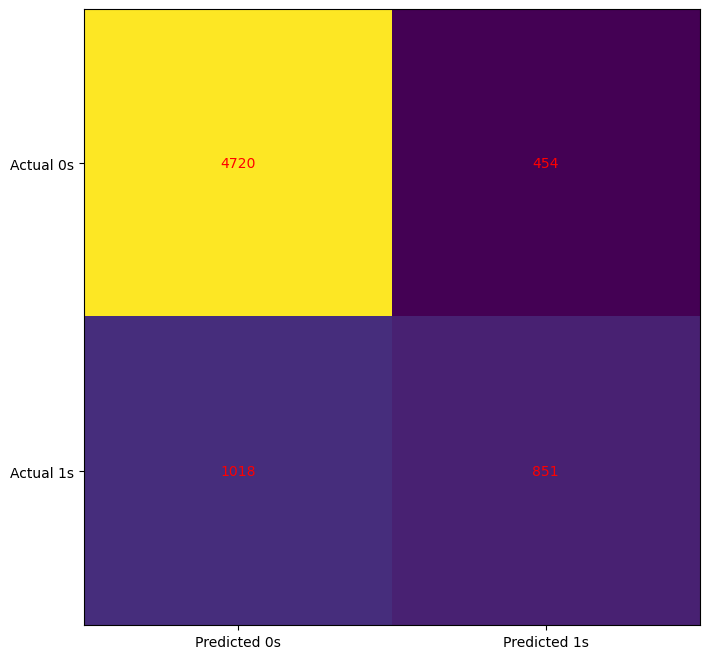

In [1005]:
cm = confusion_matrix(y, model.predict(X))


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

 # <font color='orange'>Managing imbalance in the dataset</font>

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

In [1006]:
y.value_counts()
# Uno de mis resultados va a tener muchos valores para aprender y el otro no 

Churn
0        5174
1        1869
dtype: int64

<AxesSubplot:xlabel='Churn'>

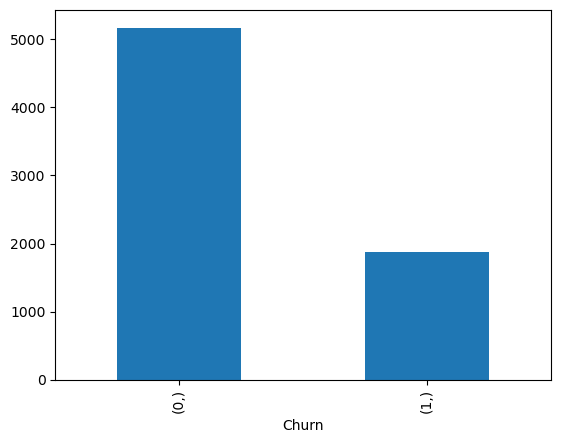

In [1007]:
y.value_counts().plot(kind='bar')
#Nuestra data no esta valanceada

# <font color='orange'>  DATA IMBALANCE CON RANDOM OVER /  UNDER SAMPLE </font>

In [1008]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [1009]:
X_over, y_over = oversample.fit_resample(X, y)

In [1010]:
y_over.value_counts()

Churn
0        5174
1        2587
dtype: int64

In [1011]:
# Aplicamos la regresion logistica
model2 = LogisticRegression( random_state=50)
model2.fit(X_over, y_over)

LogisticRegression(random_state=50)

In [1012]:
model2.classes_

array([0, 1])

In [1013]:
model2.intercept_

array([-1.16571163])

In [1014]:
model2.coef_

array([[-1.56596235,  0.23917802,  0.86973353,  0.23492622]])

In [1015]:
model2.predict_proba(X_over)

array([[0.62560703, 0.37439297],
       [0.83773244, 0.16226756],
       [0.46886715, 0.53113285],
       ...,
       [0.76935484, 0.23064516],
       [0.28996969, 0.71003031],
       [0.34497826, 0.65502174]])

In [1016]:
model2.predict(X_over)

array([0, 0, 1, ..., 0, 1, 1])

In [1017]:
model2.score(X_over,y_over)

0.7542842417214276

In [1018]:
confusion_matrix(y_over, model2.predict(X_over))

array([[4429,  745],
       [1162, 1425]], dtype=int64)

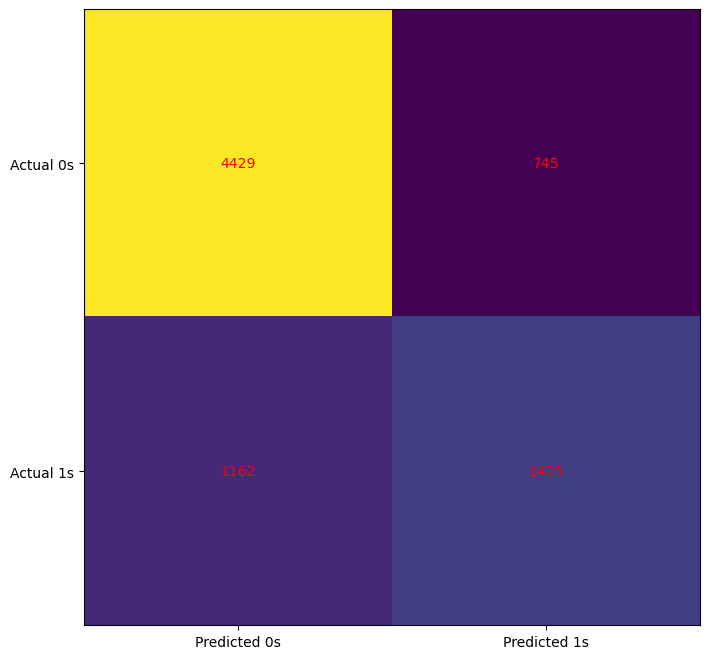

In [1019]:
cm2 = confusion_matrix(y_over, model2.predict(X_over))


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm2[i, j], ha='center', va='center', color='red')
plt.show()

In [1020]:
# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

In [1021]:

# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)

In [1022]:
y_under.value_counts()

Churn
0        1869
1        1869
dtype: int64

In [1023]:
# Aplicamos la regresion logistica
model3 = LogisticRegression( random_state=50)
model3.fit(X_under, y_under)

LogisticRegression(random_state=50)

In [1024]:
model3.classes_

array([0, 1])

In [1025]:
model3.intercept_

array([-0.44608432])

In [1026]:
model3.coef_

array([[-1.45210942,  0.22134539,  0.91318198,  0.13546788]])

In [1027]:
model3.predict_proba(X_under)

array([[0.34302813, 0.65697187],
       [0.763044  , 0.236956  ],
       [0.88979075, 0.11020925],
       ...,
       [0.10778995, 0.89221005],
       [0.76073719, 0.23926281],
       [0.12909766, 0.87090234]])

In [1028]:
model3.predict(X_under)

array([1, 0, 0, ..., 1, 0, 1])

In [1029]:
model3.score(X_under,y_under)

0.7332798287854467

In [1030]:
confusion_matrix(y_under, model3.predict(X_under))

array([[1363,  506],
       [ 491, 1378]], dtype=int64)

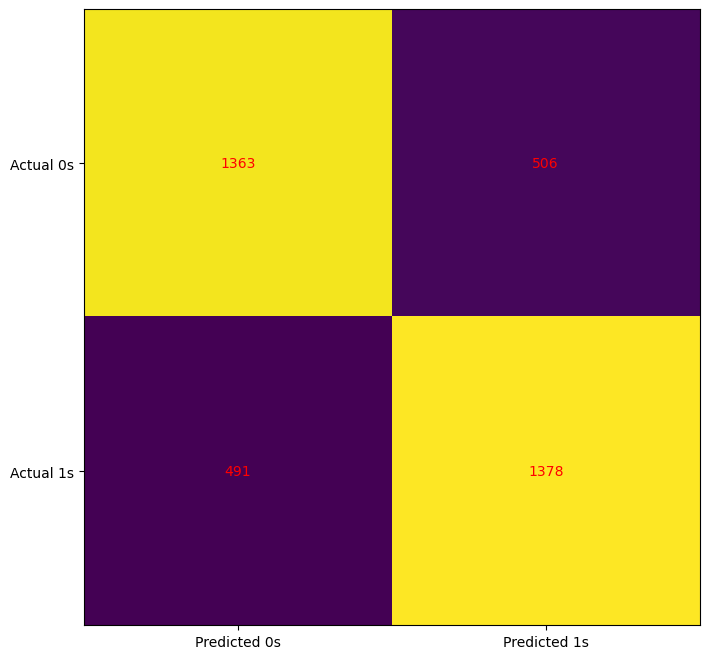

In [1031]:
cm3 = confusion_matrix(y_under, model3.predict(X_under))


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm3)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm3[i, j], ha='center', va='center', color='red')
plt.show()

# <font color='orange'>  DATA IMBALANCE CON SMOTE </font>

In [1032]:
y.value_counts()

Churn
0        5174
1        1869
dtype: int64

In [1033]:

oversample2 = SMOTE()
Xsmote,ysmote = oversample2.fit_resample(X,y)

In [1034]:
ysmote.value_counts()

Churn
0        5174
1        5174
dtype: int64

In [1035]:
# Resulto el mismo tamaño de muestra que el de arriba, apliquemos la Regresion Logistica
model4 = LogisticRegression( random_state=50)
model4.fit(Xsmote, ysmote)

LogisticRegression(random_state=50)

In [1036]:
model4.score(Xsmote,ysmote)

0.7343448009277155

# <font color='orange'> Comparación score  modelos </font>

In [1037]:
modelos = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression Random OverS', 'Logistic Regression Random UnderS', 'Logistic Regression Over S con SMOTE'],
    "Score": [model.score(X,y), model2.score(X_over,y_over), model3.score(X_under,y_under), model4.score(Xsmote,ysmote)] }) 

modelos

,Model,Score
0,Logistic Regression,0.790998
1,Logistic Regression Random OverS,0.754284
2,Logistic Regression Random UnderS,0.733280
3,Logistic Regression Over S con SMOTE,0.734345


In [1038]:
# No mejoro con ninguno XD 